<a href="https://colab.research.google.com/github/gantaphani/Phanesh_INFO5502_Spring2022/blob/main/lab_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The tenth Lab-assignment (04/28/2022, 50 points in total)

The purpose of this assignment is to practice normal distribution and annotation quality evaluation.

### Question 1 (25 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab10-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [1]:
#importing necessary modules
import pandas as pd
!pip install krippendorff
import krippendorff

In [2]:
#reading data from csv to data frame
df=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab10-dataset.csv',sep=',')
print(df.head(5).to_string(index=False))

                                                                                        Title of Article                                                                                                                                                                                                                                                                                              Contributions Source                                      Annotation1                                      Annotation2                                      Annotation3  Year
The measurement of ÒinterdisciplinarityÓ and ÒsynergyÓ in scientific and extra_scientific collaborations                                                                                                                In this study, we discuss recent advances in the operationalization and measurement of Òinterdisciplinarity,Ó and propose a methodology for measuring ÒsynergyÓ based on information theory JASIST Algorithms/ Methods Const

In [3]:
#removing new lines and double quotes from dataframe
df.replace(r'\n',' ', regex=True,inplace=True) 
df.replace(r'"',' ', regex=True,inplace=True)
df['Annotation1'].str.strip()
print(df.head(5).to_string(index=False))

                                                                                        Title of Article                                                                                                                                                                                                                                                                                              Contributions Source                                      Annotation1                                      Annotation2                                      Annotation3  Year
The measurement of ÒinterdisciplinarityÓ and ÒsynergyÓ in scientific and extra_scientific collaborations                                                                                                                In this study, we discuss recent advances in the operationalization and measurement of Òinterdisciplinarity,Ó and propose a methodology for measuring ÒsynergyÓ based on information theory JASIST Algorithms/ Methods Const

In [4]:
#stripping unwanted spaces from Annotation1,Annotation2 and Annotation3 columns
df['Annotation1']=df['Annotation1'].str.strip()
df['Annotation2']=df['Annotation2'].str.strip()
df['Annotation3']=df['Annotation3'].str.strip()

In [5]:
#getting unique values from Annotation1,Annotation2 and Annotation3 columns
uniquevalues=[]
for i in range(1,4):
  for value in df['Annotation'+str(i)].unique():
    if value not in uniquevalues:
      uniquevalues.append(value)
print(uniquevalues)

['Algorithms/ Methods Construction or Optimization', 'Theory proposal', 'Model Construction or Optimization', 'Resources', 'Performance Evaluation', 'Dataset creation', 'Applications']


In [6]:
#Labelling the unique values with category
labelCategory=dict()
temp=1
for value in uniquevalues:
  labelCategory[temp]=value
  temp+=1
print(labelCategory)

{1: 'Algorithms/ Methods Construction or Optimization', 2: 'Theory proposal', 3: 'Model Construction or Optimization', 4: 'Resources', 5: 'Performance Evaluation', 6: 'Dataset creation', 7: 'Applications'}


In [7]:
#create new columns Annotation1Category,Annotation2Category and Annotation3Category with label categories
for key in labelCategory:
  df.loc[df.Annotation1 == labelCategory[key], 'Annotation1Category'] = key
  df.loc[df.Annotation2 == labelCategory[key], 'Annotation2Category'] = key
  df.loc[df.Annotation3 == labelCategory[key], 'Annotation3Category'] = key
print(df.head(5).to_string())

                                                                                           Title of Article                                                                                                                                                                                                                                                                                               Contributions  Source                                       Annotation1                                       Annotation2                                       Annotation3  Year  Annotation1Category  Annotation2Category  Annotation3Category
0  The measurement of ÒinterdisciplinarityÓ and ÒsynergyÓ in scientific and extra_scientific collaborations                                                                                                                 In this study, we discuss recent advances in the operationalization and measurement of Òinterdisciplinarity,Ó and propose a methodology for measu

In [8]:
#finding the cohen's kappa(inter rater agreement) between Annotator 1 and 2
print(str('Measure of Agreement Between Annotator 1 and Annotator 2').center(100))
#calculating Observed agreement
observedAgreement=len(df[df['Annotation1Category']==df['Annotation2Category']])/len(df['Annotation1Category'])
print('Observed Agreement',observedAgreement)
#calculating Chance agreement
chanceAgreement=((len(df[df['Annotation1Category']==1])/len(df['Annotation1Category']))*(len(df[df['Annotation2Category']==1])/len(df['Annotation2Category'])))\
+((len(df[df['Annotation1Category']==2])/len(df['Annotation1Category']))*(len(df[df['Annotation2Category']==2])/len(df['Annotation2Category'])))\
+((len(df[df['Annotation1Category']==3])/len(df['Annotation1Category']))*(len(df[df['Annotation2Category']==3])/len(df['Annotation2Category'])))\
+((len(df[df['Annotation1Category']==4])/len(df['Annotation1Category']))*(len(df[df['Annotation2Category']==4])/len(df['Annotation2Category'])))\
+((len(df[df['Annotation1Category']==5])/len(df['Annotation1Category']))*(len(df[df['Annotation2Category']==5])/len(df['Annotation2Category'])))\
+((len(df[df['Annotation1Category']==6])/len(df['Annotation1Category']))*(len(df[df['Annotation2Category']==6])/len(df['Annotation2Category'])))
print('Chance Agreement',chanceAgreement)
#calculating cohen kappa score
score1=(observedAgreement-chanceAgreement)/(1-chanceAgreement)
print('Cohen\'s Kappa Score',score1)

                      Measure of Agreement Between Annotator 1 and Annotator 2                      
Observed Agreement 0.5715126545026487
Chance Agreement 0.2489657385970558
Cohen's Kappa Score 0.42947030845579526


In [9]:
#finding the cohen's kappa(inter rater agreement) between Annotator 2 and 3
print(str('Measure of Agreement Between Annotator 2 and Annotator 3').center(100))
#calculating Observed agreement
observedAgreement=len(df[df['Annotation2Category']==df['Annotation3Category']])/len(df['Annotation2Category'])
print('Observed Agreement',observedAgreement)
#calculating Chance agreement
chanceAgreement=((len(df[df['Annotation2Category']==1])/len(df['Annotation2Category']))*(len(df[df['Annotation3Category']==1])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation2Category']==2])/len(df['Annotation2Category']))*(len(df[df['Annotation3Category']==2])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation2Category']==3])/len(df['Annotation2Category']))*(len(df[df['Annotation3Category']==3])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation2Category']==4])/len(df['Annotation2Category']))*(len(df[df['Annotation3Category']==4])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation2Category']==5])/len(df['Annotation2Category']))*(len(df[df['Annotation3Category']==5])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation2Category']==6])/len(df['Annotation2Category']))*(len(df[df['Annotation3Category']==6])/len(df['Annotation3Category'])))
print('Chance Agreement',chanceAgreement)
#calculating cohen kappa score
score2=(observedAgreement-chanceAgreement)/(1-chanceAgreement)
print('Cohen\'s Kappa Score',score2)

                      Measure of Agreement Between Annotator 2 and Annotator 3                      
Observed Agreement 0.6439081812831077
Chance Agreement 0.2566239670810063
Cohen's Kappa Score 0.5209802267654008


In [10]:
#finding the cohen's kappa(inter rater agreement) between Annotator 1 and 3
print(str('Measure of Agreement Between Annotator 1 and Annotator 3').center(100))
#calculating Observed agreement
observedAgreement=len(df[df['Annotation1Category']==df['Annotation3Category']])/len(df['Annotation1Category'])
print('Observed Agreement',observedAgreement)
#calculating Chance agreement
chanceAgreement=((len(df[df['Annotation1Category']==1])/len(df['Annotation1Category']))*(len(df[df['Annotation3Category']==1])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation1Category']==2])/len(df['Annotation1Category']))*(len(df[df['Annotation3Category']==2])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation1Category']==3])/len(df['Annotation1Category']))*(len(df[df['Annotation3Category']==3])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation1Category']==4])/len(df['Annotation1Category']))*(len(df[df['Annotation3Category']==4])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation1Category']==5])/len(df['Annotation1Category']))*(len(df[df['Annotation3Category']==5])/len(df['Annotation3Category'])))\
+((len(df[df['Annotation1Category']==6])/len(df['Annotation1Category']))*(len(df[df['Annotation3Category']==6])/len(df['Annotation3Category'])))
print('Chance Agreement',chanceAgreement)
#calculating cohen kappa score
score3=(observedAgreement-chanceAgreement)/(1-chanceAgreement)
print('Cohen\'s Kappa Score',score3)

                      Measure of Agreement Between Annotator 1 and Annotator 3                      
Observed Agreement 0.7492642731018246
Chance Agreement 0.23820914286387343
Cohen's Kappa Score 0.6708601520359666


In [11]:
score=(score1+score2+score3)/3
print('Average Cohen\'s Kappa Score for three annotations',score)

Average Cohen's Kappa Score for three annotations 0.5404368957523875


In [12]:
values = [list(df['Annotation1Category'].values),list(df['Annotation2Category'].values),list(df['Annotation3Category'].values)]
# fleiss kappa score
fleiss_score = krippendorff.alpha(values)
print("Fleiss' Kappa Score:",fleiss_score)

Fleiss' Kappa Score: 0.5133137184777363


### Question 2 (25 points) 

Normal distribution is the default probability for many real world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD). The parameter used to measure the variability of observations around the mean is called as standard deviation. The probabilities for values occurring near mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Please generate the nromal distribution for the following cases suing Python:

(1) IQ scores (the mean is typically 100, SD = 15)

(2) Marks of students in a class (mean = 60, SD = 20)

(3) Measure of weight (mean = 80 kg, SD = 10)

(4) Measure of blood pressure (mean = 120/80, SD = 20)

(5) Measure of wealth (measurement in money; mean = $50,000 , SD = $100)

In [20]:
import warnings
warnings.filterwarnings("ignore")
from numpy import random
import matplotlib.pyplot as plt
import seaborn as s
import numpy as np
import scipy.stats

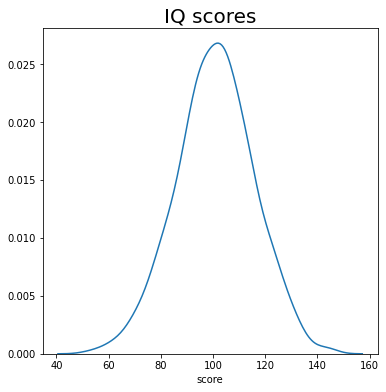

In [14]:
plt.figure(figsize=(6,6))
plt.title('IQ scores',fontsize=20)
s.distplot(random.normal(loc=100, scale=15,size=1000), hist=False)
plt.xlabel('score')
plt.ylabel('')
plt.show()

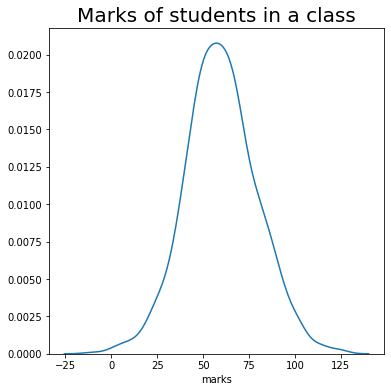

In [15]:
plt.figure(figsize=(6,6))
plt.title('Marks of students in a class',fontsize=20)
s.distplot(random.normal(loc=60, scale=20,size=1000), hist=False)
plt.xlabel('marks')
plt.ylabel('')
plt.show()

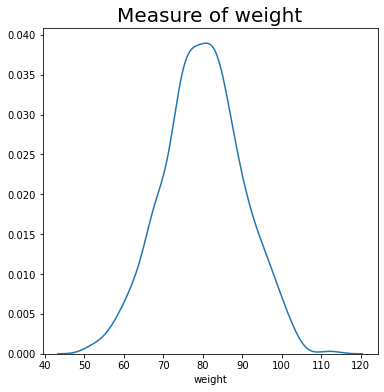

In [16]:
plt.figure(figsize=(6,6))
plt.title('Measure of weight',fontsize=20)
s.distplot(random.normal(loc=80, scale=10,size=1000), hist=False)
plt.xlabel('weight')
plt.ylabel('')
plt.show()

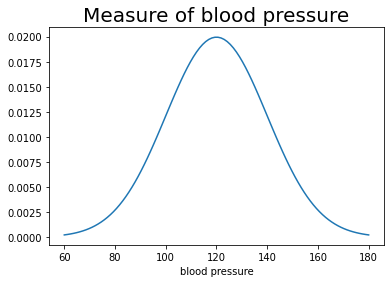

In [24]:
# plotting normal distribution
mu = 120
sigma = 20
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.title('Measure of blood pressure',fontsize=20)
plt.xlabel('blood pressure')
plt.show()

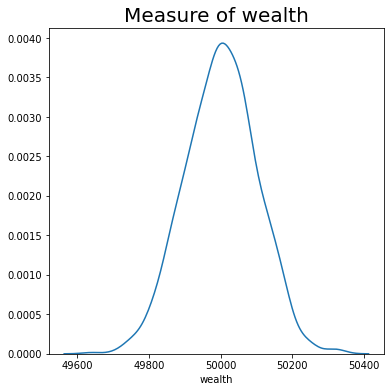

In [21]:
# plotting normal distribution
mu = 50000
sigma = 100
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.title("Measure of wealth")
plt.xlabel("Wealth")
plt.show()